In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
covid_stats=pd.read_csv("covid-statistics-by-us-states-daily-updates.csv")

In [23]:
covid_stats.head()

,Unnamed: 0,date,state,positive,negative,pending,hospitalizedcurrently,hospitalizedcumulative,inicucurrently,inicucumulative,...,posneg,deathincrease,hospitalizedincrease,hash,commercialscore,negativeregularscore,negativescore,positivescore,score,grade
0,0,2020-07-29,AK,3442.0,220222.0,NaN,45.0,NaN,NaN,NaN,...,223664,0,0,e3c05df1cf92b9c80941cec8daaf723905e7a0dd,0,0,0,0,0,NaN
1,1,2020-07-29,AL,83782.0,584493.0,NaN,1598.0,9893.0,NaN,1109.0,...,668275,47,0,a7b049cfd14780e56e6ef98fb2aba9f82fe89838,0,0,0,0,0,NaN
2,2,2020-07-29,AR,40968.0,454637.0,NaN,508.0,2747.0,NaN,NaN,...,495605,6,61,e1fad45c3dbf16efc7ddd84400b3629a9c824a71,0,0,0,0,0,NaN
3,3,2020-07-29,AS,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,...,1037,0,0,62e46ea05669252eb426e2da4a1e822abcf86cb3,0,0,0,0,0,NaN
4,4,2020-07-29,AZ,168273.0,733156.0,NaN,2424.0,10060.0,800.0,NaN,...,901429,46,666,9c7e10ce8b2fb77e7a69df1d09c60accaab1a498,0,0,0,0,0,NaN


In [24]:
covid_stats=covid_stats.drop(['Unnamed: 0', 'posneg', 'hash', 'commercialscore', 'negativeregularscore',
                             'negativescore', 'positivescore', 'grade', 'score'], 
                             axis=1)

In [25]:
covid_stats=covid_stats[covid_stats.state=='NY']

In [26]:
covid_stats=covid_stats.drop(['state'], axis=1)

In [27]:
covid_stats.head()

,date,positive,negative,pending,hospitalizedcurrently,hospitalizedcumulative,inicucurrently,inicucumulative,onventilatorcurrently,onventilatorcumulative,...,deathconfirmed,deathprobable,fips,positiveincrease,negativeincrease,total,totaltestresults,totaltestresultsincrease,deathincrease,hospitalizedincrease
37,2020-07-29,413593.0,5333229.0,NaN,619.0,89995.0,154.0,NaN,76.0,NaN,...,NaN,NaN,36,715,61561,5746822,5746822,62276,6,0
93,2020-07-28,412878.0,5271668.0,NaN,648.0,89995.0,152.0,NaN,81.0,NaN,...,NaN,NaN,36,534,56863,5684546,5684546,57397,9,0
149,2020-07-27,412344.0,5214805.0,NaN,642.0,89995.0,149.0,NaN,84.0,NaN,...,NaN,NaN,36,608,56662,5627149,5627149,57270,11,0
205,2020-07-26,411736.0,5158143.0,NaN,637.0,89995.0,155.0,NaN,90.0,NaN,...,NaN,NaN,36,536,53032,5569879,5569879,53568,3,0
261,2020-07-25,411200.0,5105111.0,NaN,646.0,89995.0,149.0,NaN,94.0,NaN,...,NaN,NaN,36,750,70716,5516311,5516311,71466,13,0


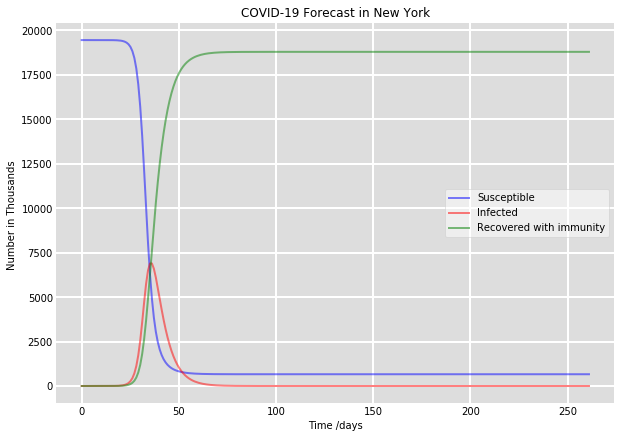

In [35]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 19453556
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.7, 0.2 
# A grid of time points (in days)
t = np.linspace(0, 261, 261)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number in Thousands ')
ax.set_title('COVID-19 Forecast in New York')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
fig.set_size_inches(10, 7)    
plt.show()